In [1]:
from dsd import *
from datetime import datetime

# DSP

In [2]:
import networkx as nx

# test graphs
karate_graph = nx.karate_club_graph()
karate_edges = [[e[0],e[1]] for e in nx.karate_club_graph().edges()]


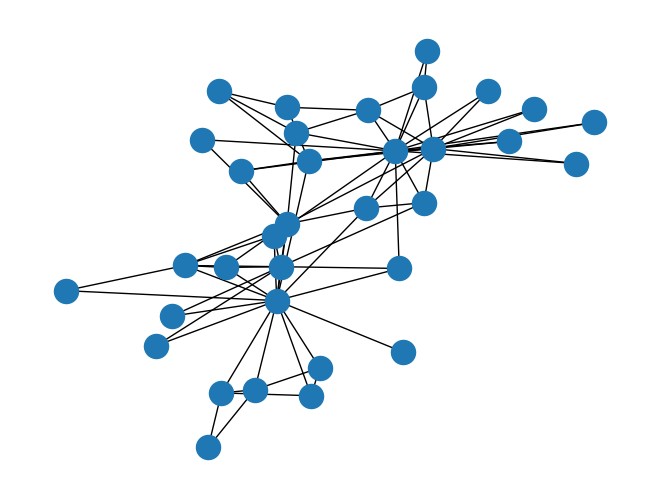

In [3]:
nx.draw(karate_graph)

In [4]:

# d = DenseSubgraphFuncs()

print('exact max flow method')

start = datetime.now()
exact_R = exact_densest(karate_graph)
print('subgraph induced by', exact_R[0])
print('density =', exact_R[1])
print('run time', datetime.now()-start, '\n')


print('flowless method')

start = datetime.now()
flowless_R = flowless(karate_graph, 5)
print('subgraph induced by', flowless_R[0])
print('density =', flowless_R[1])
print('run time', datetime.now()-start, '\n')

print('greedy method')

start = datetime.now()
greedy_R = greedy_charikar(karate_graph)
print('subgraph induced by', greedy_R[0])
print('density =', greedy_R[1])
print('run time', datetime.now()-start, '\n')

exact max flow method
subgraph induced by [0, 1, 2, 3, 32, 33, 7, 8, 13, 19, 23, 27, 28, 29, 30, 31]
density = 2.6249003690831803
run time 0:00:00.141913 

flowless method
subgraph induced by [0, 1, 2, 3, 7, 8, 13, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33]
density = 2.611111111111111
run time 0:00:00.003538 

greedy method
subgraph induced by [0, 1, 2, 3, 7, 8, 13, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33]
density = 2.611111111111111
run time 0:00:00.001192 



# Example that greedy<flowless =exact

In [5]:
edges = [[0,1],[0,2],[1,2],[2,3],[3,4],[1,3],[1,4],[2,4],[3,5],[4,5],[6,7],[6,8],[6,9],[7,8],[7,9],[8,9]]
print('exact max flow method')

start = datetime.now()
exact_R = exact_densest(edges)
print('subgraph induced by', exact_R[0])
print('density =', exact_R[1])
print('run time', datetime.now()-start, '\n')


print('flowless method')

start = datetime.now()
flowless_R = flowless(edges, 5)
print('subgraph induced by', flowless_R[0])
print('density =', flowless_R[1])
print('run time', datetime.now()-start, '\n')

print('greedy method')

start = datetime.now()
greedy_R = greedy_charikar(edges)
print('subgraph induced by', greedy_R[0])
print('density =', greedy_R[1])
print('run time', datetime.now()-start, '\n')

exact max flow method
subgraph induced by [0, 1, 2, 3, 4, 5]
density = 1.66328125
run time 0:00:00.015632 

flowless method
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
subgraph induced by [0, 1, 2, 3, 4, 5]
density = 1.6666666666666667
run time 0:00:00.000824 

greedy method
iteration 1
subgraph induced by [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
density = 1.6
run time 0:00:00.000515 



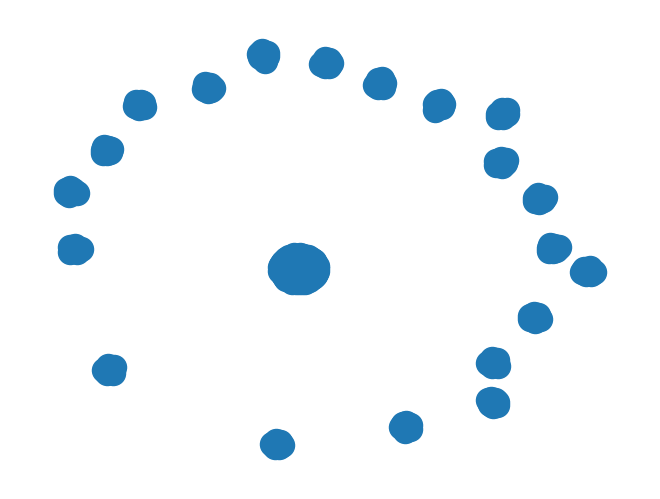

In [6]:
def bad_charikar_instance(d=10,D=1000,copies=10):
    ''' This function returns an instance that is really bad for Charikar's greedy algorithm.
    This graph is the union of K(d,D), and copies times K(d+2),...,K(d+2). 
    '''
    G = nx.complete_bipartite_graph(d,D)
    for i in range(copies):
            G = nx.disjoint_union(G,nx.complete_graph(d+2))
    return G

B = bad_charikar_instance(5,100,20)
nx.draw(B)

In [7]:
print('exact max flow method')

start = datetime.now()
exact_R = exact_densest(B)
print('subgraph induced by', exact_R[0])
print('density =', exact_R[1])
print('run time', datetime.now()-start, '\n')


print('flowless method')

start = datetime.now()
flowless_R = flowless(B, 5)
print('subgraph induced by', flowless_R[0])
print('density =', flowless_R[1])
print('run time', datetime.now()-start, '\n')

print('greedy method')

start = datetime.now()
greedy_R = greedy_charikar(B)
print('subgraph induced by', greedy_R[0])
print('density =', greedy_R[1])
print('run time', datetime.now()-start, '\n')

exact max flow method
subgraph induced by [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
density = 4.761901003973826
run time 0:00:00.530626 

flowless method
subgraph induced by [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104]
density = 4.757281553398058
run time 0:00:00.

# k-clique dense subgraph (k=3)

In [8]:
# test graph, in format of 3-clique list

clique_list = [[0,1,2],[0,1,3],[0,3,2],[1,3,2],[0,4,5]]

In [9]:

print('exact max flow method')

start = datetime.now()
print('subgraph induced by', exact_densest(clique_list)[0])
print('run time', datetime.now()-start, '\n')

# print(d.exact_densest(karate_edges))

# print(d.exact_densest(karate_graph))


print('flowless method')

start = datetime.now()
print('subgraph induced by', flowless(clique_list, 2)[0])
print('run time', datetime.now()-start, '\n')

# print(d.flowless(karate_edges, 2))

# print(d.flowless(karate_graph, 2))


print('greedy method')

start = datetime.now()
print('subgraph induced by', greedy_charikar(clique_list)[0])
print('run time', datetime.now()-start, '\n')

# print(d.greedy_charikar(karate_edges))

# print(d.greedy_charikar(karate_graph))

exact max flow method
subgraph induced by [0, 1, 2, 3]
run time 0:00:00.005962 

flowless method
iteration 1
iteration 2
subgraph induced by [0, 1, 2, 3]
run time 0:00:00.000274 

greedy method
iteration 1
subgraph induced by [0, 1, 2, 3]
run time 0:00:00.000186 

